In [2]:
# importar a biblioteca
import pandas as pd

# leitura dos arquivos
df1 = pd.read_excel("./datasets/Aracaju.xlsx")
df2 = pd.read_excel("./datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./datasets/Natal.xlsx")
df4 = pd.read_excel("./datasets/Recife.xlsx")
df5 = pd.read_excel("./datasets/Salvador.xlsx")

# juntar os arquivo um baixo do outro
df = pd.concat([df1, df2, df3, df4, df5])

# Alterar o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

# Criando um coluna pela divisão de outras colunas
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

# Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

# criando uma coluna de mês e outra de dia de uma única vez
df["Mes_venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

# Calculando a diferença de dias
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

# Criando a coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

display(df)

C:\Users\SAMBAT~1\AppData\Local\Temp/ipykernel_20804/277930293.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1


### Visualização de dados

In [3]:
# quantidade de vendas por id de loja ordenando do maior para o menor
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

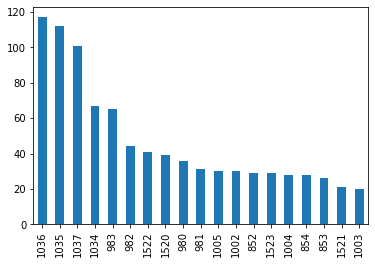

In [5]:
# grafico de barras com o total de venda por loja
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

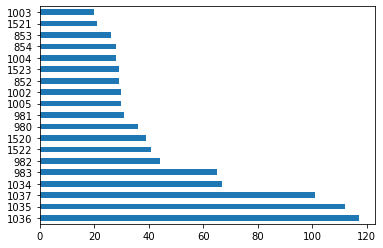

In [6]:
# grafico de barras horizontais com o total de venda por loja
df["LojaID"].value_counts(ascending=False).plot.barh()

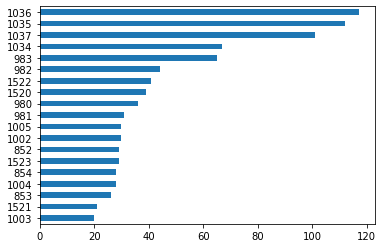

In [8]:
# grafico de barras horizontais com o total de venda por loja (; retira a mensagem que aparece antes do gráfico)
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot:ylabel='Receita'>

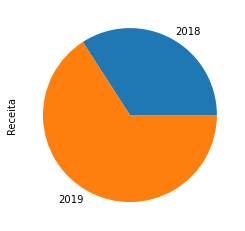

In [9]:
# gráfico de pizza - receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [10]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

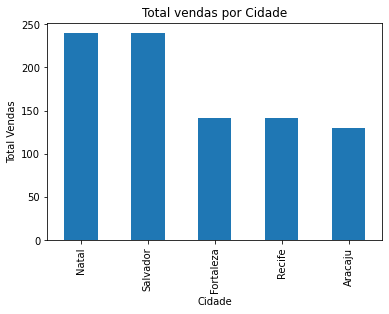

In [15]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

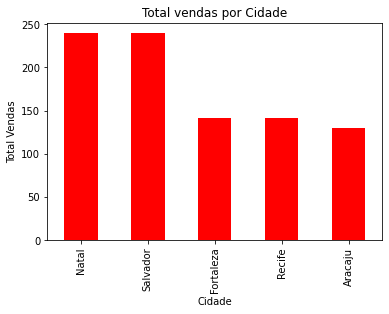

In [17]:
# Alterando a cor do gráfico
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [18]:
# Alterando o estilo do gráfico
plt.style.use("ggplot")

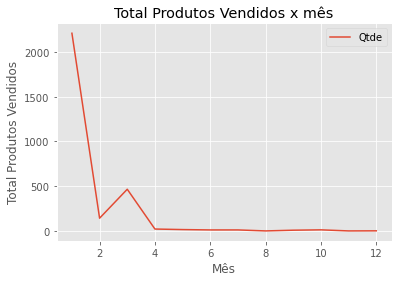

In [22]:
# Quantidade venda por mês
df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [23]:
# quantidade de produto vendidos no mês
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [25]:
# selecionando somente o ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1


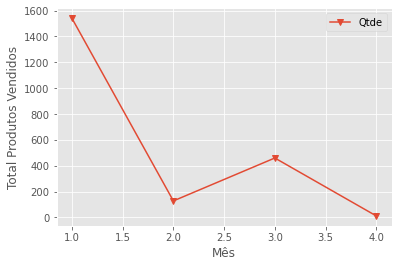

In [27]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

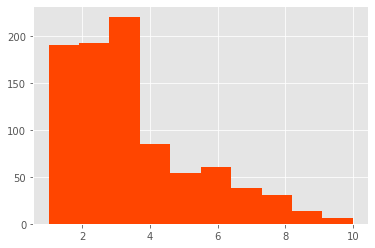

In [30]:
# histograma de quantidade de produto vendidos
plt.hist(df["Qtde"], color="orangered");

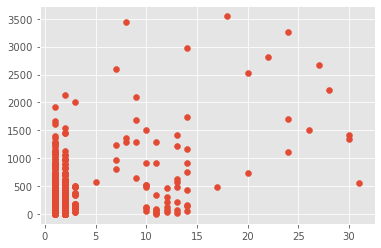

In [33]:
# um grafico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

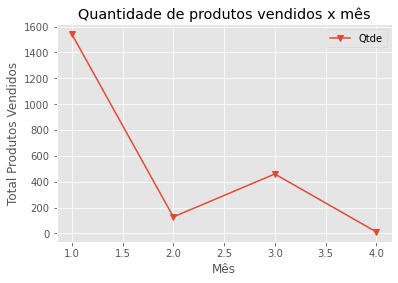

In [36]:
# Gerando um imagem do gráfico
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v", title = "Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico_QTDExMES.png");